<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week1_LectureSlidelide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM 5222 
# Lecture 1

## Exploratory Data Analysis

* Working with R and Python (rpy2 package)
* Histograms and KDE
* Empirical Quantiles
* QQ plots
* Tests of Normality
* Box plots
* Data Transformations

On of the most important steps when working with data, and often neglected, is the need to explore the data to get a feel for it *before* beginning to do statistical analysis. This will often help to avoid issues and pitfalls arising from data outliers, skewness, kurtosis, and multiple modes.

## Working with R and Python

Generally speaking, we will use and Python most of our examples will be done using Pythong.  However, because the the text uses R for its examples, we will at time want to be able to run R code.  Fortunately, there is package that allows this to be done.  It is call rpy2. The following code loades the package so that R cells can be succesfully run inside the Jupyter notbook. Importantly, data frames can be passed back and forth as we will illustrate


In [ ]:
import rpy2.rinterface


%load_ext rpy2.ipython


We can now create pthon cells by starting the cells with %%R

In [ ]:
%%R

# typically, when working in R, I prefer too use the tidyverse.  

library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



 [1]  1  2  3  4  5  6  7  8  9 10


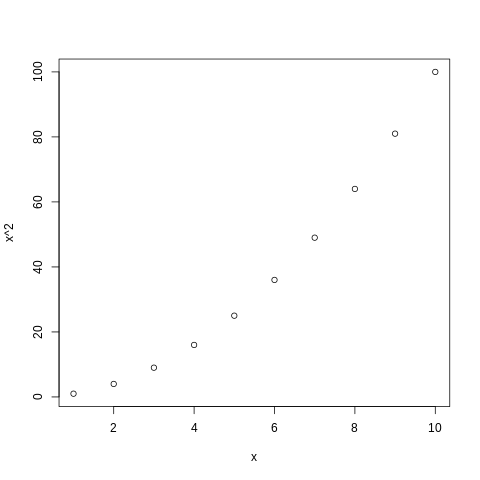

In [ ]:
%%R

#now we will do something typical in R

x <- seq(10)
print(x)

plot(x, x^2)

Now let's create a data frame in python and send it to R.

In [ ]:
import numpy as np
import pandas as pd



In [ ]:
DF1 = pd.DataFrame([["Minnesota", "Gophers", 100],["St. Thomas", "Tommies", 87], ["Gustavus Adolphus", "Gusties", 92],\
                    ["Luther", "Norse", 85]], columns = ["School", "Nickname", "rating"],\
                    index = [1,2,3,4])

DF1

,School,Nickname,rating
1,Minnesota,Gophers,100
2,St. Thomas,Tommies,87
3,Gustavus Adolphus,Gusties,92
4,Luther,Norse,85


Now we pass this Data Frame to R and do something with it

In [ ]:
%%R -i DF1

summary(DF1)


DF2 <- DF1 %>%
      mutate(AdjRating = rating - mean(rating))

DF2


             School Nickname rating AdjRating
1         Minnesota  Gophers    100         9
2        St. Thomas  Tommies     87        -4
3 Gustavus Adolphus  Gusties     92         1
4            Luther    Norse     85        -6


Now we pass it back.

In [ ]:
%R -o DF2

In [ ]:
DF2



,School,Nickname,rating,AdjRating
1,Minnesota,Gophers,100,9.0
2,St. Thomas,Tommies,87,-4.0
3,Gustavus Adolphus,Gusties,92,1.0
4,Luther,Norse,85,-6.0


In [ ]:
type(DF2)

pandas.core.frame.DataFrame

## Histograms and Kernel Denisity Estimators  (KDEs)

When you have a set of data points, one of quickest ways to get a sense of it is to create a histogram.  We will pull some market data here and make some histograms.

In [ ]:
! pip install yfinance

     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 46.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf  


In [ ]:
SP500 = yf.Ticker("^GSPC").history(start = "1981-01-01", end = "2020-01-01")
SP500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1981-01-02,0.000000,137.100006,134.610001,136.339996,28870000,0,0
1981-01-05,0.000000,139.240005,135.860001,137.970001,58710000,0,0
1981-01-06,0.000000,140.320007,135.779999,138.119995,67400000,0,0
1981-01-07,0.000000,136.020004,132.300003,135.080002,92890000,0,0
1981-01-08,0.000000,136.100006,131.960007,133.059998,55350000,0,0
...,...,...,...,...,...,...,...
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,1296540000,0,0
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,2160680000,0,0
2019-12-27,3247.229980,3247.929932,3234.370117,3240.020020,2428670000,0,0


As will often be the case, we will be interested in the returns.  Naively, let's first start with absolute returns.

In [ ]:
SP500["R_abs"] = SP500.Close.diff()

SP500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,R_abs
Date,,,,,,,,
1981-01-02,0.0,137.100006,134.610001,136.339996,28870000,0,0,NaN
1981-01-05,0.0,139.240005,135.860001,137.970001,58710000,0,0,1.630005
1981-01-06,0.0,140.320007,135.779999,138.119995,67400000,0,0,0.149994
1981-01-07,0.0,136.020004,132.300003,135.080002,92890000,0,0,-3.039993
1981-01-08,0.0,136.100006,131.960007,133.059998,55350000,0,0,-2.020004


Let's plot the returns as a time-series.

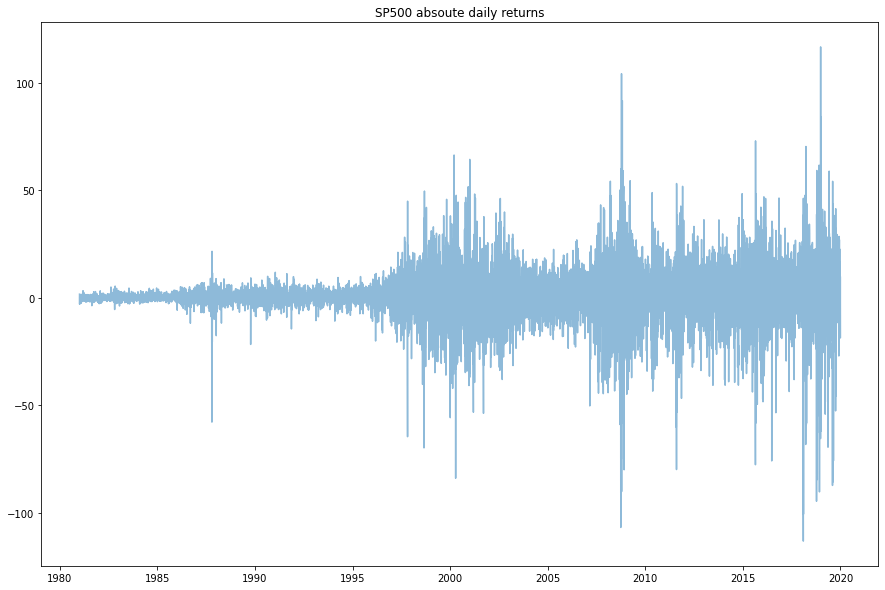

In [ ]:
plt.figure(figsize =(15,10))

plt.plot(SP500.R_abs, alpha = .5)

plt.title("SP500 absoute daily returns")

plt.show()

Not surprisingly, this time series shows ever inceasing variance over time. This is because the level of S&P500 is increasing and more likely it is the relative returns that are more stationary. On easy way to correct for this is to track the log-returns.

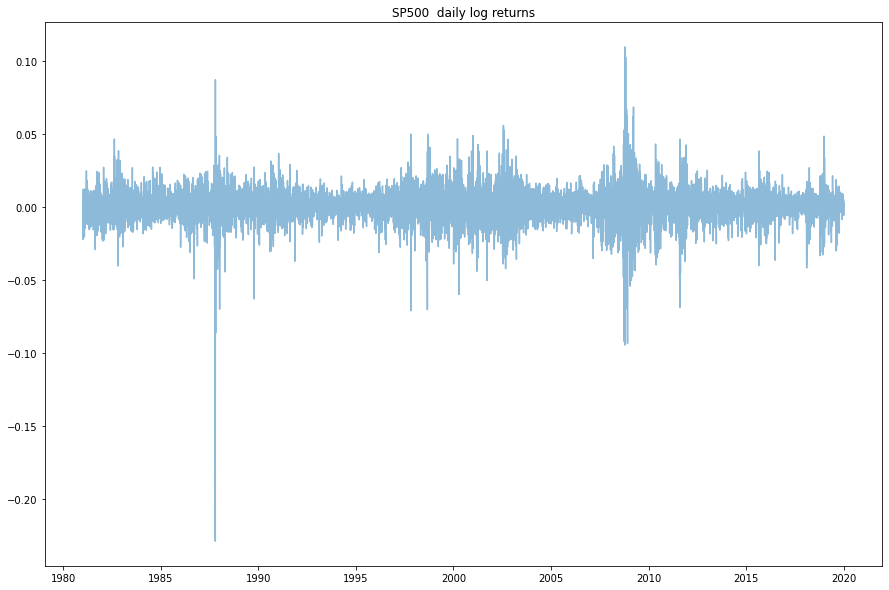

In [ ]:
SP500["logClose"] = np.log(SP500.Close)

SP500["R_log"] = SP500.logClose.diff()


plt.figure(figsize =(15,10))

plt.plot(SP500.R_log, alpha = .5)

plt.title("SP500  daily log returns")

plt.show()


So, even though there is clearly volatility clustering and some large jumps (here and there), this is much more of a stationary series.


### Histograms

A quick tool to get a feel for the distribution of returns is a historgram.

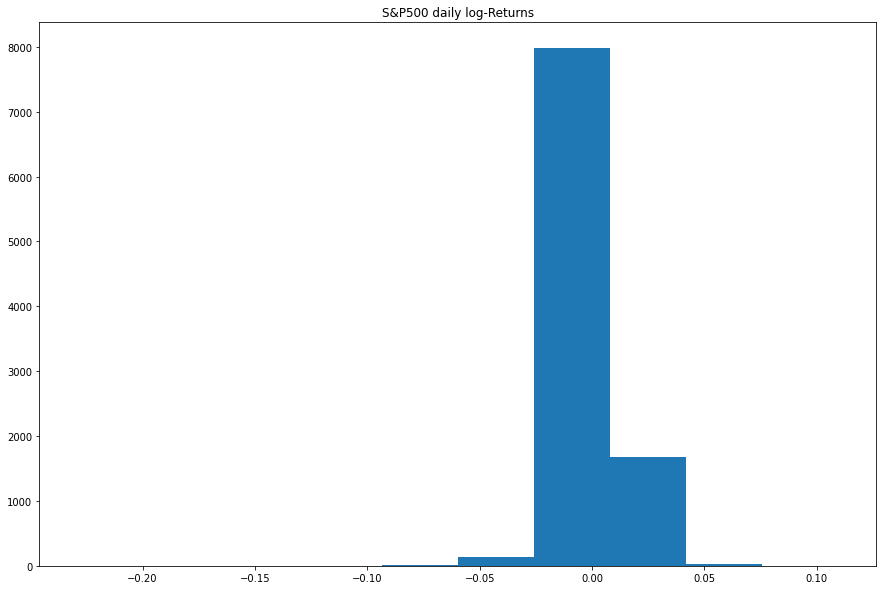

In [ ]:
plt.figure(figsize = (15,10))
plt.hist(SP500.R_log)

plt.title("S&P500 daily log-Returns")
plt.show()

We see right away that the bin selection is rather poor.  We will subjectively change it to get something more pleaseing to us (and hopefully more useful)

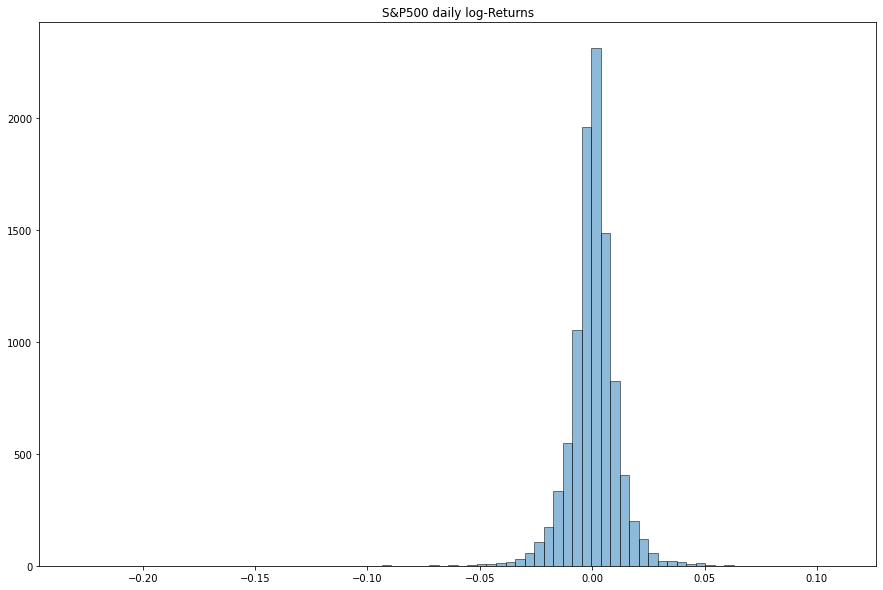

In [ ]:
plt.figure(figsize = (15,10))
plt.hist(SP500.R_log, bins = 80, alpha = .5, edgecolor = 'black')

plt.title("S&P500 daily log-Returns")
plt.show()

### KDE

If we pick a bin size we like, we can "see" the underlying the PDF.  A more direct way to estimate the denisty is to use a Kernel Denisity Estimator.  

The idea is relatively simple, around each data point, apply a symmetric function (called the kernel) that peaks at that point.  The kernel is scaled so that it a probability distribution.  The estimated PDF is just the average all the functions.  

Most commonly, the kernel is the "Guassian Kernel". 


#### Example


Consider a small data set given below.  We generate it here as drawn from a gamma distribution, but we will imagine that we only have the data points and are attempting to understand the distribution that generated it.

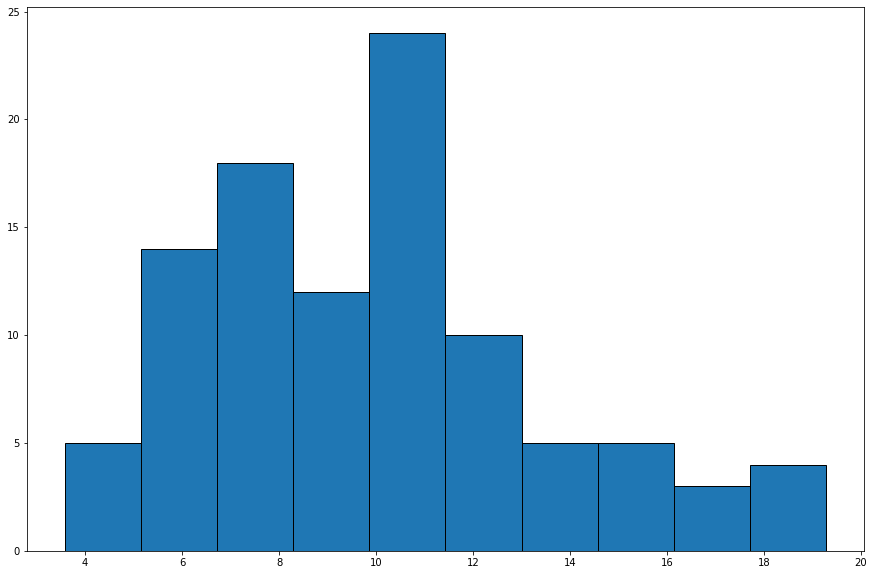

In [ ]:
from scipy.stats import  gamma

example_data = gamma.rvs(size = 100, a= 10)

plt.figure(figsize = (15,10))
plt.hist(example_data, edgecolor = 'black')
plt.show()



For each point $x_i$, we will define the function $f_i(x) = \phi(x-x_i)$ where $\phi$ is the standard normal PDF.

That is,

$$\phi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$$


Our estimated PDF for the set of data will then be:

$$f_{KDE}(x) = \frac{1}{100} \sum_{i= 1}^{100} f_i(x)$$


We will plot a few of the $f_i's$ to and then the average of them.

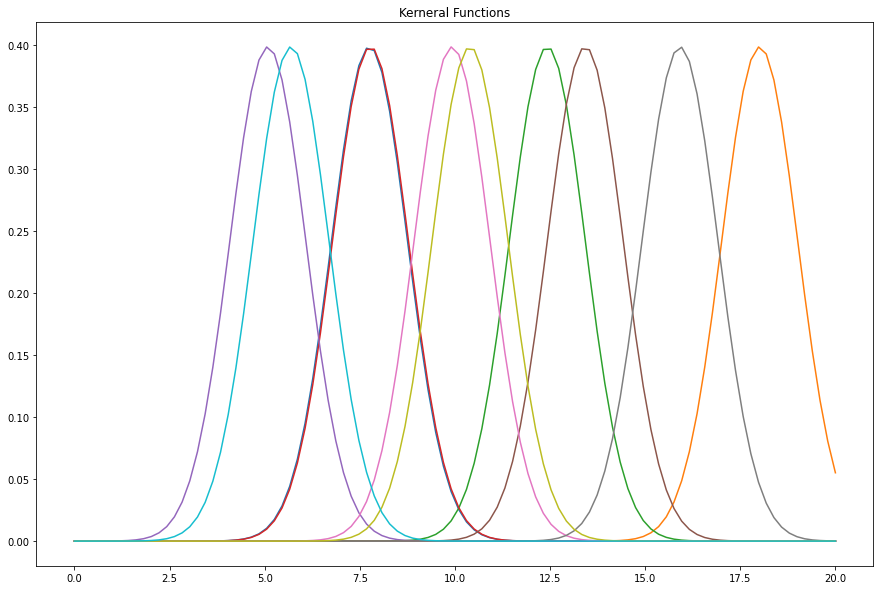

In [ ]:
from scipy.stats import norm

x = np.linspace(0,20, 100)

plt.figure(figsize= (15,10))

for k in range(10):  # only plotting 10 of them
    
    plt.plot(x, norm.pdf(x-example_data[k] ))


plt.title("Kerneral Functions")    
plt.show()    
    
    




And then averaging them:

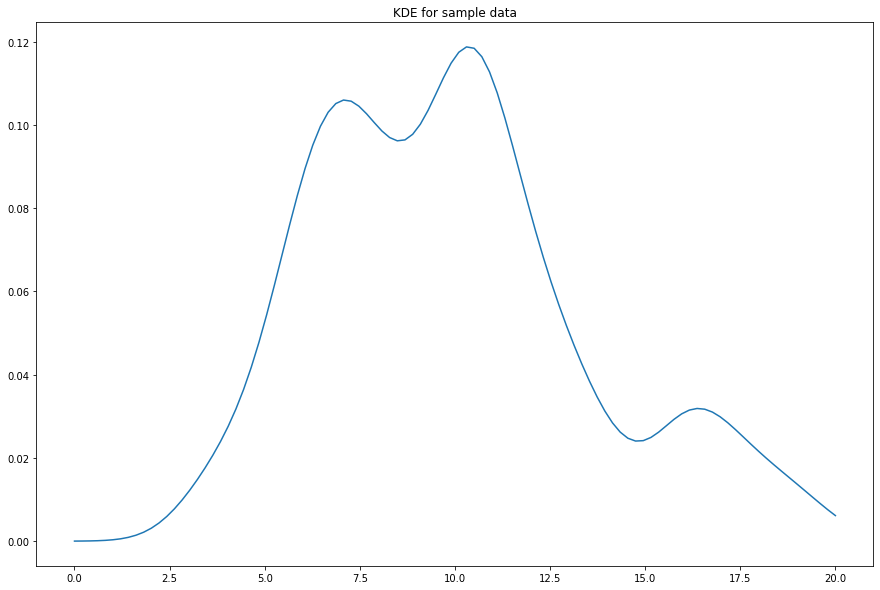

In [ ]:
f_kde = lambda x: norm.pdf(x - example_data).mean()

f_kde_v = np.vectorize(f_kde)


plt.figure(figsize= (15,10))

plt.plot(x,f_kde_v(x))

plt.title("KDE for sample data")


plt.show()


We compare this with the histogram here

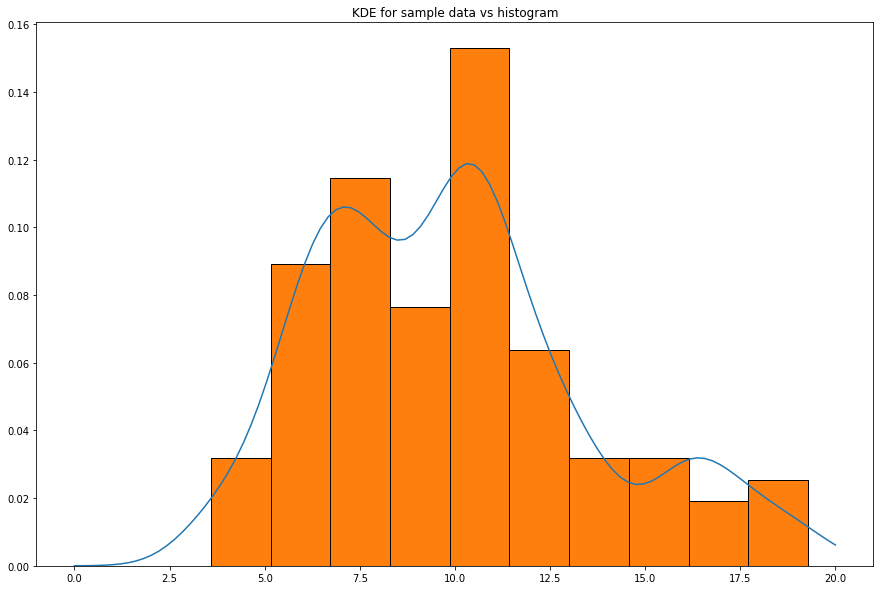

In [ ]:
plt.figure(figsize= (15,10))

plt.plot(x,f_kde_v(x))

plt.hist(example_data, edgecolor = 'black', density = True)

plt.title("KDE for sample data vs histogram")

plt.show()

More generally, a KDE requires us to choose the kernel density and the bandwidth.  In the above example, we used the Guassian kernel with a bandwidth of $1$.   Formally, 

Let $k(x)$ be a pdf with a mean of zero and is symmetric ($k(-x) = k(x)$), then given a bandwidthe $h$ and a dataset $\{x_i\}, i = 1,...,N$,  we define the Kernel Density Estimator to be:

$$f_{KDE}(x;h) \triangleq  \frac{1}{N} \sum_{i=1}^N \frac{1}{h}k\left(\frac{x-x_i}{h}\right)$$

In the above exmample, let's change the bandwidth (this is equivalent to changing $\sigma$ when the kernal is normal).

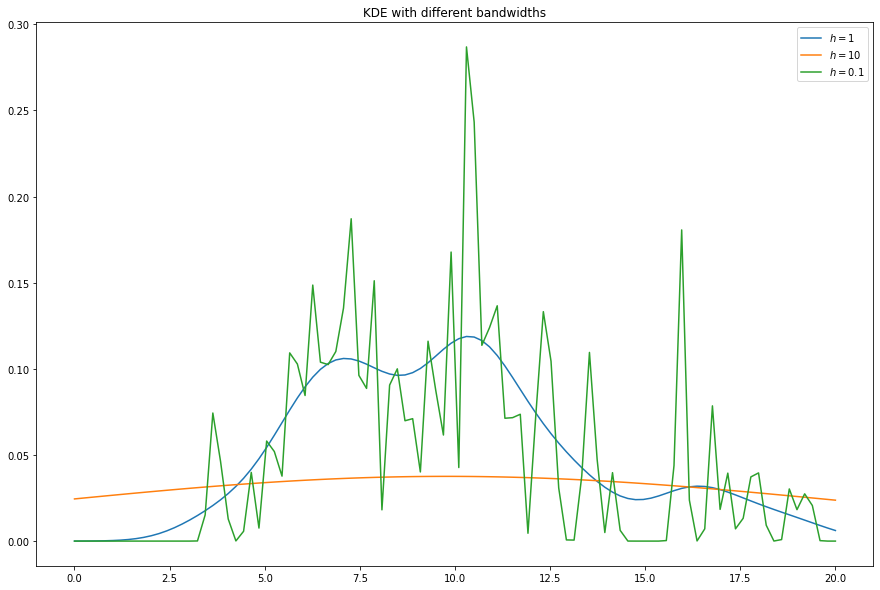

In [ ]:
f_kde_1 = lambda x: norm.pdf(x - example_data,scale = 1).mean()

f_kde_1_v = np.vectorize(f_kde_1)

f_kde_tenth = lambda x: norm.pdf(x - example_data,scale = 0.1).mean()

f_kde_tenth_v = np.vectorize(f_kde_tenth)


f_kde_10 = lambda x: norm.pdf(x - example_data,scale = 10).mean()

f_kde_10_v = np.vectorize(f_kde_10)




plt.figure(figsize= (15,10))

plt.plot(x,f_kde_1_v(x), label ="$h=1$")
plt.plot(x,f_kde_10_v(x), label ="$h=10$")
plt.plot(x,f_kde_tenth_v(x), label ="$h=0.1$")


plt.legend()
plt.title("KDE with different bandwidths")


plt.show()

You can see that the choice of bandwidth can matter. It can be too small or too big.  There are different approaches for selecting it "automatically", but trial and error often works just fine.


Let us now change the kernel function, but it turns out that it doesn't really matter than much for larger data sets.    We will use a very simple one sometimes called "top hat".

$k(x) = \begin{cases}0.5, & |x| \leq 1 \\ 0, & |x| >1 \\ \end{cases}$

Or, graphically:

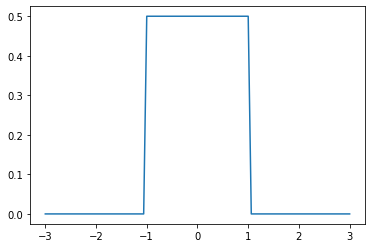

In [ ]:
f_tophat = lambda x: 0.5*(abs(x) <=1)

s = np.linspace(-3,3, 100)

plt.plot(s, f_tophat(s))

plt.show()

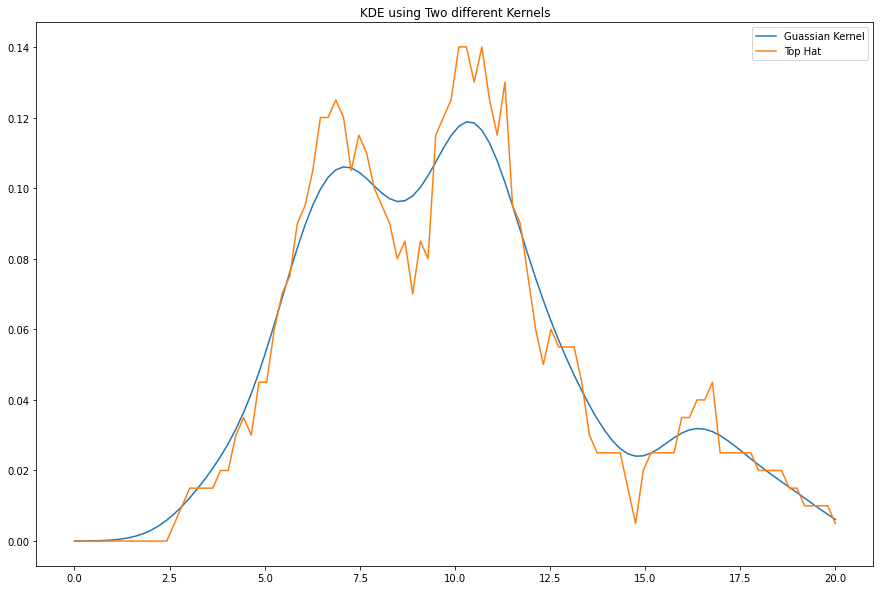

In [ ]:

x = np.linspace(0,20, 100)
f_kde_th = lambda x: f_tophat(x - example_data).mean()

f_kde_th_v = np.vectorize(f_kde_th)


plt.figure(figsize= (15,10))

plt.plot(x,f_kde_1_v(x), label ="Guassian Kernel")
plt.plot(x,f_kde_th_v(x), label = "Top Hat")

plt.legend()

plt.title("KDE using Two different Kernels")


plt.show()

As you might expect, there are many python packages that will save you the work.  To name a few:

* Seaborn had KDEplot and it's default in  distplot
* scipy.stats has gaussian_kde
* pandas has plot.kde (which uses guassian_kde)
* sklearn has a KernelDensity module (in the neighbors module)
* The package KDEpy


In R, there is the density() command in base R.



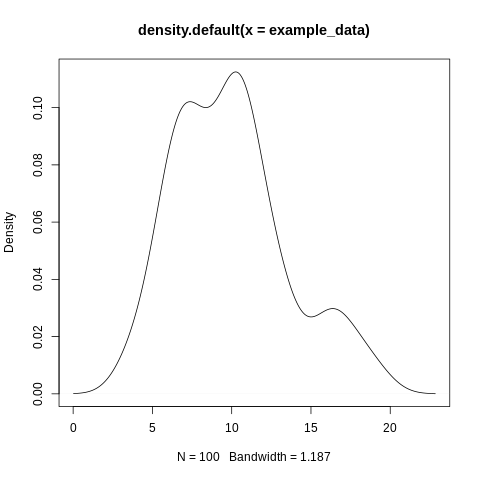

In [ ]:
%%R -i  example_data


d <- density(example_data)

plot(d)

## ECDF and Quantile estimates

In addition to the PDF, we are often also interested in the CDF. Once we have estimated the PDF, we can of course numerically integrate this to estimate the CDF.  However, a more direct approach is simply to calculate the *empirical* CDF, or ECDF for short.

We can do this by calculating the ECDF of each data point.  Recall that if $X$ is a random variable with CDF $F_X(x)$, then by definition

$$\mathrm{Pr}(X \leq x) = F_X(x)$$ 

For a data set $\{x_i\}, i = 1,...,N$, the empirical CDF $ECDF(x)$ of a given point $x$ can be defined via

$$ECDF(x) = \frac{\sum_{i=1}^N I_{(-\infty,x] }(x_i)}{N}$$

where

$I_A(x) = \begin{cases}1, & x \in A \\ 0, & x \notin A \\ \end{cases}$

In other words, it simply counts how many out of $N$ points $x_i$ are less than our equal to the given point $x$. 



We can code this in python easily.



In [ ]:
def ecdf(data):
    # Will return the ECDF function of a given point
    f = lambda x:  np.sum(data <=x)/np.size(data)
    fv = np.vectorize(f)   # Vectorizing it will make it so we can plot
    return(fv)
    
    
    

Let's plot this with our sample data

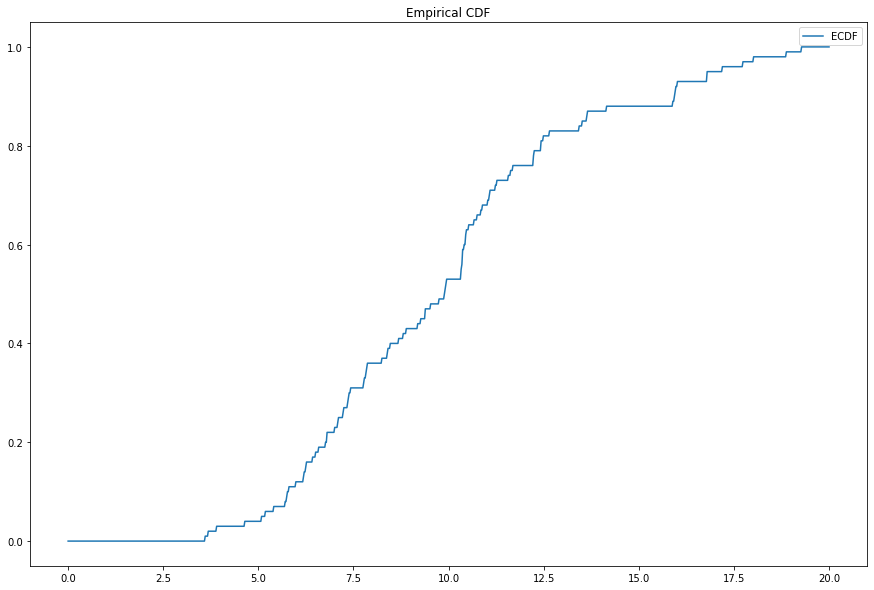

In [ ]:
x = np.linspace(0,20, 1000)
Ecdf = ecdf(example_data)

plt.figure(figsize= (15,10))

plt.plot(x,Ecdf(x), label ="ECDF")


plt.legend()
plt.title("Empirical CDF")

plt.show()


### Quantiles

The quantile $q$ of a distribution is just the value $X_q = F^{-1}_X(q)$.  It represents the value at which the $\mathrm{Pr}(X\leq X_q) = q $ 

Best known is the median, which is $X_{0.5}$   Other common quantiles in practice at quartiles $(q = 0.25, .5, .75)$, quintiles $(q= .2, .4,.6,.8)$, and deciles $q = .1, .2,...,.9$

And of course, the the ever common percentile $ptile$ where $q = ptile \times .01$


Given a data set, we may be interested estimating a particular quantile $q$. But suppose that we have ordered the data so that $x_i \leq x_j$ for $i< j$ and that we have $ECDF(x_i) < q < ECDF(x_{i+1})$, how shall we estimate $X_q$?

There is no unique way to do this, but a few common choices are:

1. $X_q \approx x_{i+1}$  (round up)
2. $X_q \approx x_i$  (round down)
3. $X_q \approx x_i + m(q - ECDF(x_i))$ where $m = \frac{x_{i+1} - x_i}{ECDF(x_{i+1}) - ECDF(x_i)}$  (linearly interpolate) 

Of course, once you linearly interpolate, you can consider all sorts of things likes cubic splines etc.


## QQ plots


Suppose that you have a distribution and you are wondering if it is from the Normal Distribution.  You are looking for ways to assess visually whether the data fits the normal distribution. One important tool is the QQ plot (or more specifically, the Qnorm plot).


Here is the idea. We are going to plot the ordered pairs $(x_i, \Phi^{-1}(ECDF(x_i))$ where

$\Phi$ is the CDF of the standard normal distribution.


If the distribution $F_X(x)$ is normal with mean $\mu$ and variance $\sigma^2$ and assuming that $ECDF(x_i) \approx F_X(x_i)$, then we will have that

$$\Phi^{-1}(ECDF(x_i)) \approx \Phi^{-1}(F_X(x_i)) = \frac{x_i - \mu}{\sigma}$$

So, if $F_X(x)$ is normal, the plotted points should fall on a line.

In practice however, the largest value $x_{max}$ will have $ECDF(x_{max}) = 1$ and therefore $\Phi^{-1}(F_X(x_{max})) = +\infty$

Consequently, for the purposes of QQ plotting, ECDF is modified slightly:


$$ECDF^*(x) = \frac{\sum_{i=1}^N I_{(-\infty,x] }(x_i)-\frac{1}{2}}{N}, x \geq x_{min}$$


Let's try this with our sample data set:


In [ ]:
from scipy.stats import norm

def ecdfq(data):
    # Will return the ECDF function of a given point
    f = lambda x:  (np.sum(data <=x)-0.5)/np.size(data)
    fv = np.vectorize(f)
    return(fv)

Ecdfq = ecdfq(example_data)


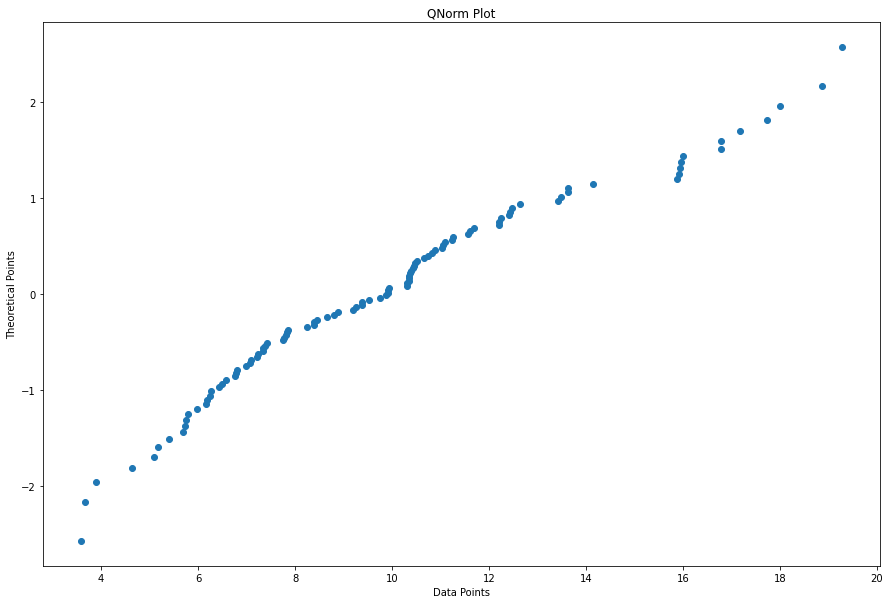

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(example_data, norm.ppf(Ecdfq(example_data)))

plt.xlabel("Data Points")
plt.ylabel("Theoretical Points")

plt.title("QNorm Plot")

plt.show()

A reference line will be helpful, but what should it be?  There are several options here, but we will just list a few:

* Fit a line between the first and third quartile points (most common)
* Plot $y = \frac{x-\bar{x}}{s}$ where $\bar{x}$ is the mean of the sample and $s$ is the variance of the sample.
* Fit a regression to the plot.

Let's do the first one ourselves.



In [ ]:
# Get slope

m = (norm.ppf(.75) - norm.ppf(.25))/(np.quantile(example_data, .75)-np.quantile(example_data, .25))

# define function

qql = lambda x: m*(x-np.quantile(example_data, .25)) +  norm.ppf(.25)


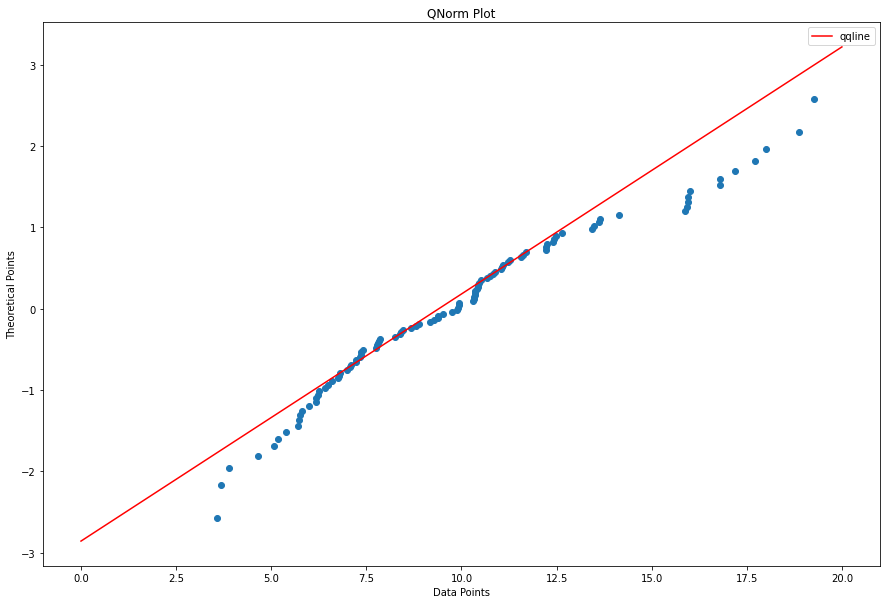

In [ ]:
plt.figure(figsize=(15,10))

plt.scatter(example_data, norm.ppf(Ecdfq(example_data)))

plt.plot(x,qql(x), color = "r", label="qqline")
plt.legend()

plt.xlabel("Data Points")
plt.ylabel("Theoretical Points")

plt.title("QNorm Plot")

plt.show()

#### Interpretation

In Ruppert and Matteson, they discuss how to interpret the convexity/concavity on the left and right sides of the QQNorm plot in terms of Skewness and Kurtosis.  But just memorizing these can be a bit dangerous because 

1. Softwares packages are inconsistent as to whether the data goes on the x-axis or the y-axis
2. If the distribution exhibits both skew and kurtosis, the graph can become confusing.

My recommendation is to use the plots to detect non-normality.  But then to use other metrics to find skew, kurtosis, etc.  For example, one can just calculate the excess kurtosis. 


In python, QQnorm plots can produced with the statsmodels package (see below).

You can also use probplot from scipy.stats (see below)

Of course, as decsribed in the text, R has qqnorm()







/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


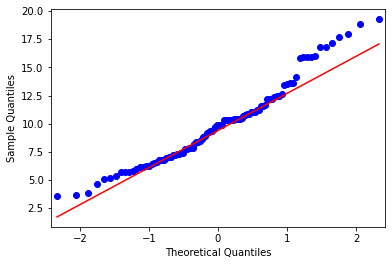

In [ ]:
import statsmodels.api as sm

sm.qqplot(example_data, line='q')

plt.show()

#Note that the plot here has the sample points associated with the y axis.

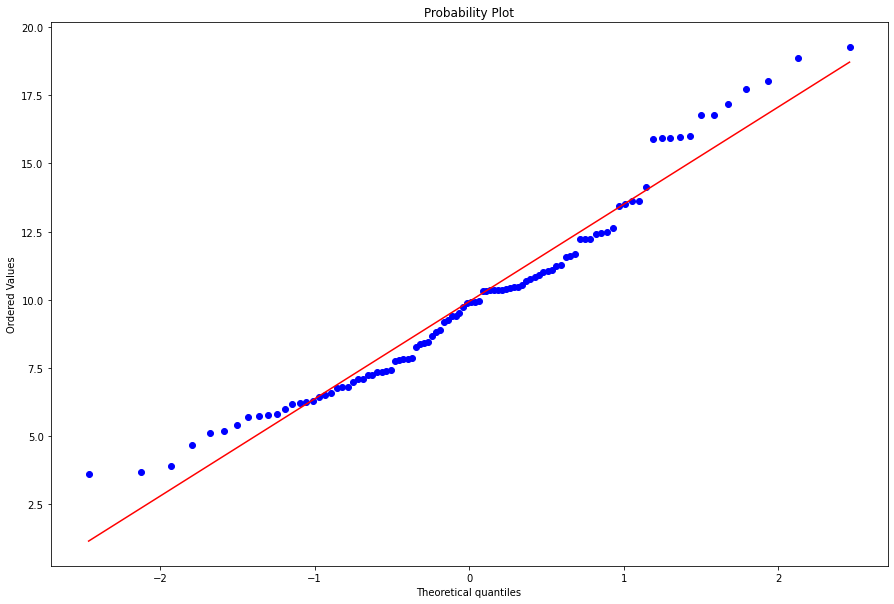

In [ ]:
from scipy.stats import probplot




fig, ax  = plt.subplots( figsize=(15, 10))

probplot(example_data, dist="norm", plot = ax)

plt.show()

### QQ plots 

More generally, a QQ plot can be used to visually check whether two sets of data are from the same distribution up to a scale and location parameter.  Suppose we have two sets of data $\{x_i\}, i= 1,...N$ and $\{y_j\}, j = 1, ..., M$.

We are interested the question as to whether the underlying generating distributions $X$ and $Y$ satisfy:

$Y = \beta (X- \alpha)$  

Here, $\alpha$ is a location parameter and $\beta$ is a scale parameter.

The concept is the same as for the QQ norm plot except here we plot the ordered pairs:


$$(x_i , q_y(ECDF(x_i))$$

where $q_y$ is the emperical quantile function of the $y$ data.

If the hypothesis is true, data points should fall on a line.  We can try this easily enough. 



In [ ]:
xdata = gamma.rvs(size = 100, a= 10)

ydata = gamma.rvs(size = 150, a = 10, loc = 30, scale = 5)

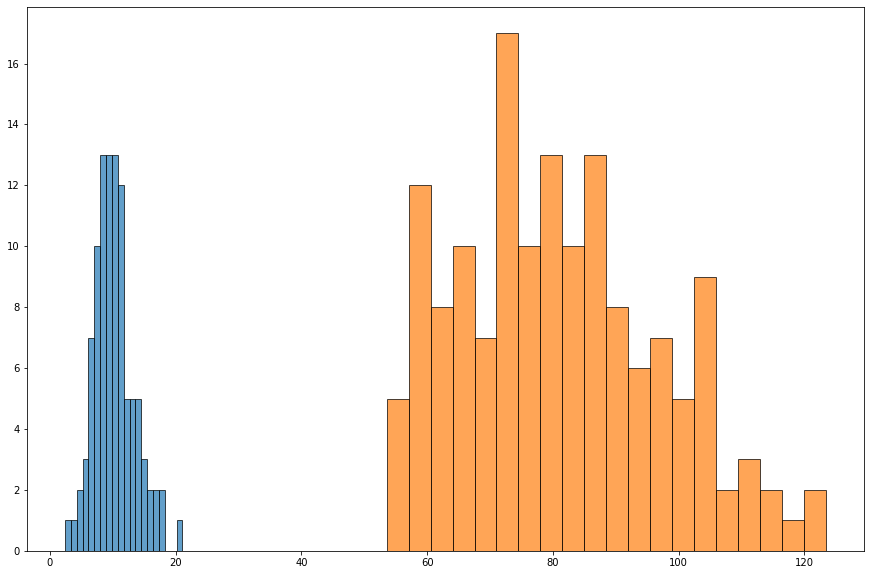

In [ ]:
plt.figure(figsize = (15,10))

plt.hist(xdata, bins = 20,alpha = .7, edgecolor = 'black')
plt.hist(ydata,bins = 20, alpha = .7, edgecolor = 'black')

plt.show()

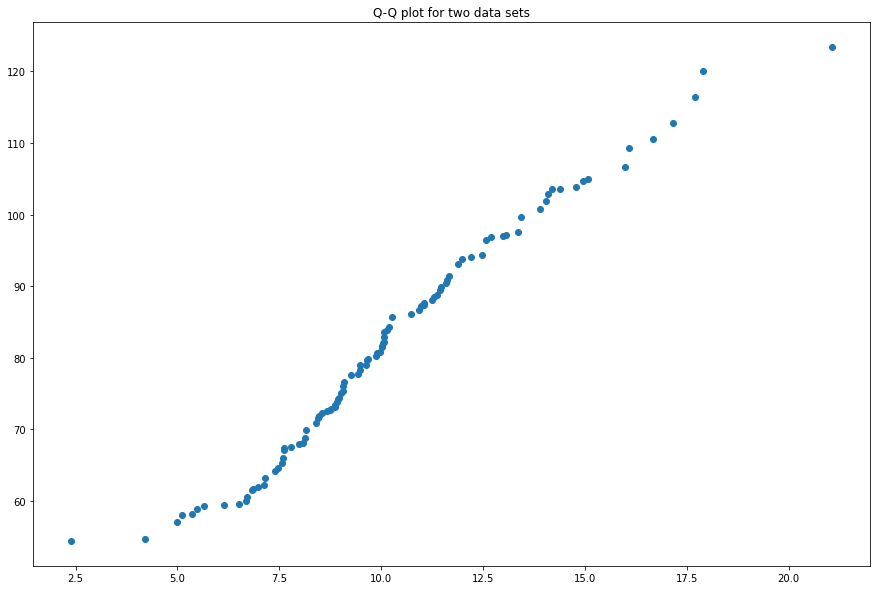

In [ ]:
Ecdfx = ecdf(xdata)

plt.figure(figsize =(15,10))



plt.scatter(xdata,  np.quantile(ydata,(Ecdfx(xdata))))


plt.title("Q-Q plot for two data sets")

plt.show()

Now suppose that we had two data sets not from the same distribution.

In [ ]:

from scipy.stats import lognorm


xdata = gamma.rvs(size = 100, a= 5)

ydata = lognorm.rvs(size = 150, s= 1)

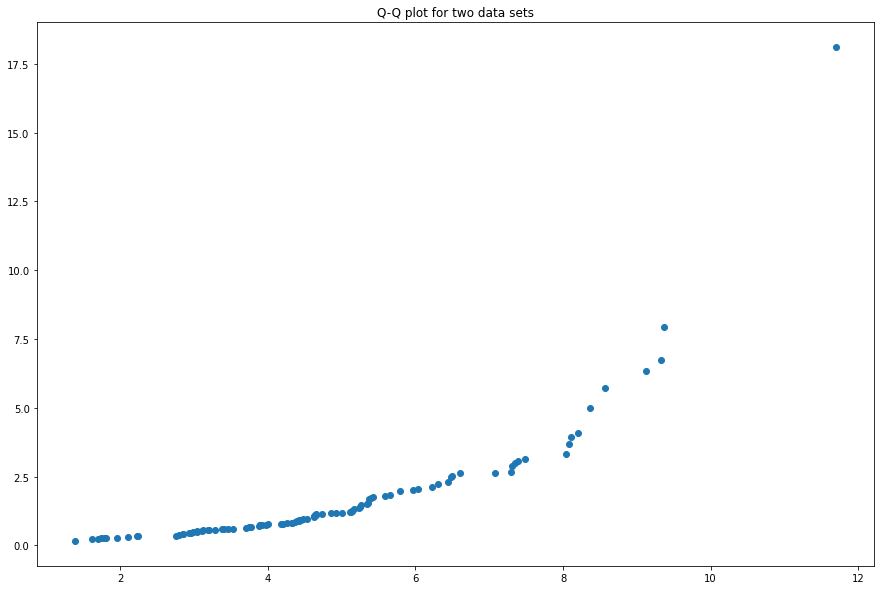

In [ ]:
Ecdfx = ecdf(xdata)

plt.figure(figsize =(15,10))

plt.scatter(xdata,  np.quantile(ydata,(Ecdfx(xdata))))

plt.title("Q-Q plot for two data sets")


plt.show()

#### Comment

Another way to generate this is just to use np.quantile  (this is easier in fact)

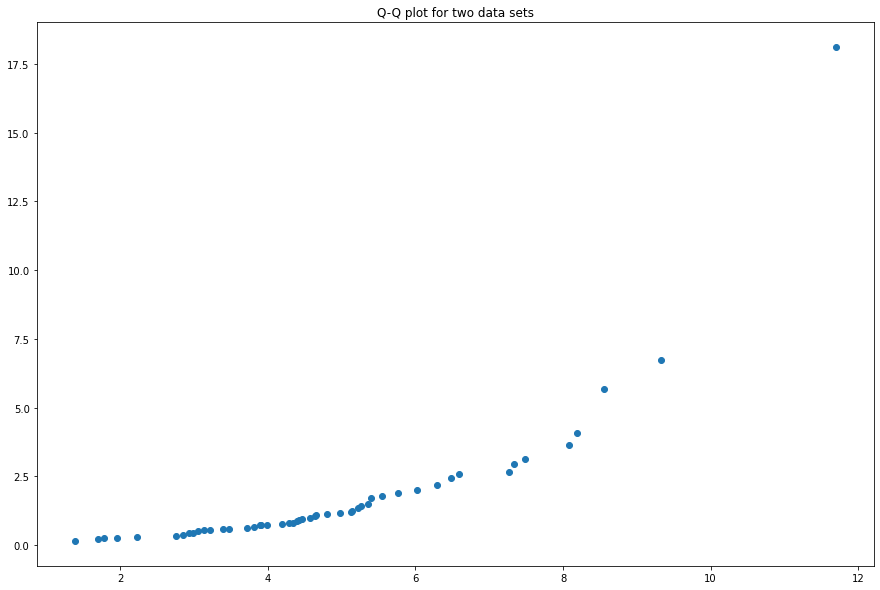

In [ ]:
q = np.linspace(0,1)

plt.figure(figsize = (15,10))

plt.scatter(np.quantile(xdata, q), np.quantile(ydata, q))

plt.title("Q-Q plot for two data sets")

plt.show()

## Tests of Normality

Although QQnorm plots can give us an idea that a distribution is not normal, ultimately, we will want to use more rigorous statistical tests. 

Here we will briefly describe a few of the more common ones.


### Shapiro-Wilk test

A QQNorm plot looks at the ordered pairs $(x_i, \Phi^{-1}(ECDF(x_i))$ and we know that if the hypothesis of normality is true, then the plot should look like a straight line.

When ordered pairs of data fall along a line, their correlation will be close to $1$. The Shapiro-Wilk test calculates the sample correlation and uses it the test stastistic.

It is implemented in python via shapiro from scipy.stats


### Anderson-Darling test

Many tests for normality (there are many!) attempt to compare the emperical CDF with the theoretical CDF.

In particular, the A_D test measures the "distance" between the two via


$$\int_{-\infty}^{\infty} (ECDF(y)-\Phi(y))^2 w(y) \phi(y) dt$$ 

where

$\Phi(y)$ is the standard normal CDF

$\phi(y)$ is the standard normal PDF

$w(y) = \frac{1}{\Phi(y)(1-\Phi(y)}$ is a weighting function  (designed to put more weight in the tails).

The empirical CDF is constructed after transforming the data $x_i \to \frac{x_i -\bar{x}}{s}$ so that the sample mean is 0 and the sample variance is 1. 


Comments:

1. A more straight forward variation where the weighting function is just $w(y) =1$ is called the Cramer-von Mises test.  But it is not as sensitive.

2. There are some studies that claim that Shapiro-Wilk has the highest power (most sensitive) among the popular test. But the Anderson-Darling works quite well also, and in some cases does better than Shapiro-Wilk.


### Jarque-Bera test

The Jarque-Bera test is conceptually simple in that is looks at the sample skew and kurtosis and tests to see if they are two far away from their corresponding values in the case that the distribution is normal.

That test statistic is 

$$\frac{N}{6}\left(S^2 + \frac{1}{4}(K-3)^2  \right)$$
where
$S$ is the sample skew and
$K$ is the sample kurtosis.

Note that $K-3$ called the excess kurtosis since the kustosis of the normal distribution is 3$

This test is quite popular but generally not a sensitive as Shapiro-Wilk or Anderson-Darling.


### Lillefors Test ( and Kolmogorov-Smirnov)

Probably the most famous (and one of the oldest) tests for normality is the Kolmogorov-Smirnov test.  Like the Anderson-Darling test, it attempts to measure the distance between the Emperical CDF and $\Phi$.  The distiance metric in KS is

$$\max\left( |ECDF(x) - \Phi(x)|\right)$$

The drawback of K-S is that the critical values are determined only for the case of standard normal.  The Lillefors test adjusts for this by (similar to A-D) transforming that data $x_i \to \frac{x_i -\bar{x}}{s}$

In practice, the Lillefors test is usually weaker than the above tests.










#### Example.

Apply the above tests to the sample data.

In [ ]:
from scipy.stats import shapiro, anderson, jarque_bera

from statsmodels.stats.diagnostic import lilliefors



print(shapiro(xdata))
print(anderson(xdata))
print(jarque_bera(xdata))
print(lilliefors(xdata))

(0.9582424759864807, 0.003019309137016535)
AndersonResult(statistic=1.1422123181066866, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
(11.136507815201458, 0.003817139695665328)
(0.11015926044377533, 0.0044786072214930885)


Let's make it a little harder.

In [ ]:
xdata = gamma.rvs(size = 30, a = 2, random_state=42)

print(shapiro(xdata))
print(anderson(xdata))
print(jarque_bera(xdata))
print(lilliefors(xdata))

(0.9232860803604126, 0.03266509994864464)
AndersonResult(statistic=0.7290375486552527, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
(5.46979522995258, 0.06490065161846881)
(0.13569033974693473, 0.16649757323618058)


So here we see that Shapiro-Wilkes rejects at $p=.03$, 

Anderson-Darling at $p \in (.025, .05)$  (closer to $.05$)

Jarque_Bera at $p = .06$

Lilliefors at $p = .17$


Of course, this is a cooked example. One would want too simulate to determine which test seems to work the best.




## Box Plots

And important EDA visualization tool is the Box Plot.   The box-plot will show the inter-quartile range, the median, a normalized "range", and any outliers.  

Let's start with an example.

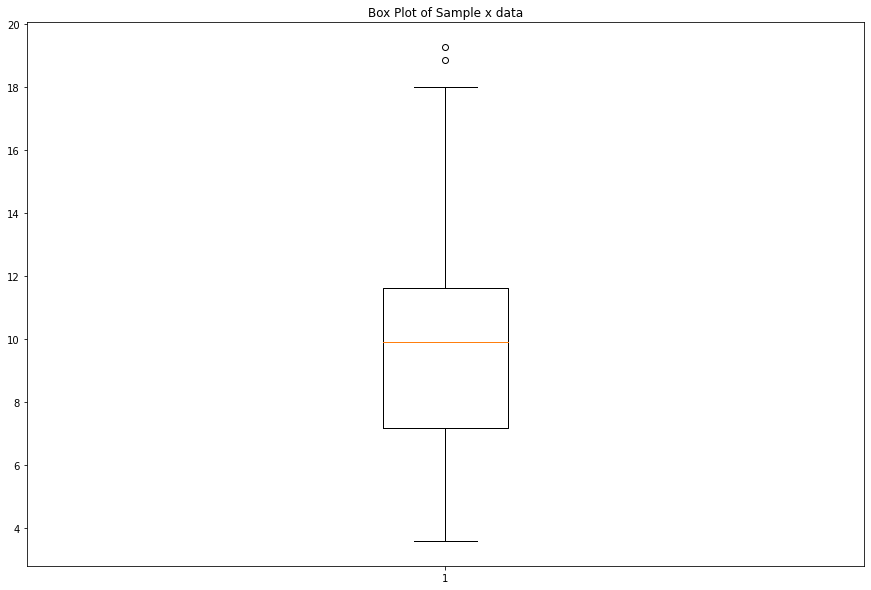

In [ ]:
plt.figure(figsize = (15,10))

plt.boxplot(example_data)

plt.title("Box Plot of Sample x data")

plt.show()

We see that the median is just aabouot 9. The first quartile is about 7 and the 3rd quartile is about 12.  The "range" indicators look to be about 4 on the low end and 18 on the high end. These are also called "whiskers".  There indicated "outliers" on the high side.

How are the ranges determined?

In plt.boxplot, upper is set to be the largest point *below* $Q3 + 1.5\times IQR$ where $IQR = Q3 - Q1$

The lower whisker is set to be the smallest point *above* $Q1 - 1.5\times IQR$

What is special about $1.5$? Nothing in particular, other than it tends to be a good guidpoint for outlier detection (though this is itself subjective).


In the case of the standard normal distribution, let compute the point $Q3 + 1.5 IQR$ and $Q1 - 1.5 IQR$

In [ ]:
IQR = norm.ppf(.75) - norm.ppf(.25)
print("The IQR in the standard normal distribution is ", IQR)

upper = norm.ppf(.75) + 1.5*IQR
print("The upper whisker value is",upper ) 

lower = norm.ppf(.25) - 1.5* IQR

print("The lower whisker value is", lower ) 

The IQR in the standard normal distribution is  1.3489795003921634
The upper whisker value is 2.697959000784327
The lower whisker value is -2.697959000784327


So, those limits are set at about $\pm 2.7$ standard deviations from the mean in the case of the normal distribution.  We would expect about $\Phi(2.7) - \Phi(-2.7) \approx 99.3\%$ of the data to fall within this range.  

Note also that if the data exhibits skew, the distances from the IQR to the upper whisker will differ from the distance from the IQR to the lower whisker.

Hence, the box plot can quickly detect:

1. Fat Tails (many outliers)
2. Skew or asymmetry




Let's look at log-returns of the S&P500 under a box-plot

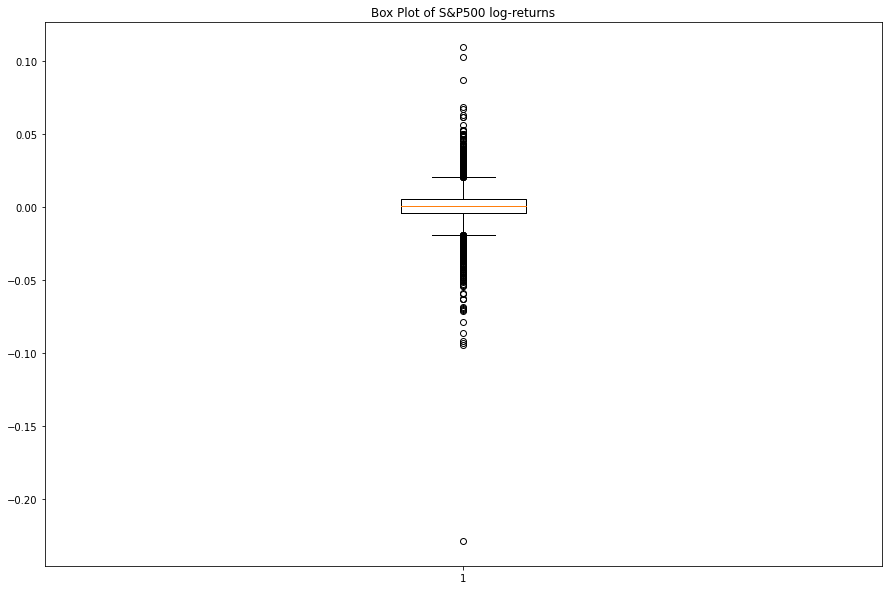

In [ ]:
plt.figure(figsize = (15,10))

plt.boxplot(SP500.R_log.dropna())

plt.title("Box Plot of S&P500 log-returns")

plt.show()

## Data Transforms


Often, data can be more effectivley analysed if it "behaves" in certain standard ways.  One way to achieve this is through transforms of the data.  These can help the data to be more tractable for analysis.

For example, perhaps we wish to compare to the standard normal distribution.  Then we often will transform the data via $x_i \to \frac{x_i -\bar{x}}{s}$ 


As discussed at the beginning of the lecture, we log-tranformed the S&P500 data because other wise the magnitude of the returns varied with the level of the S&P500. Therefor, the variance exhibited returns grows with time.  This makes analysis more challenging.

But log-transforms aren't the only game in town.  They are a special case of the Box-Cox transform:

$$x_i \to \begin{cases}\frac{x_i^{\alpha} -1}{\alpha},& \alpha \neq 0\\ \ln(x_i), & \alpha = 0 \\ \end{cases}$$


The choise of $\alpha$ matter more than the scaling to location change (when $\alpha \neq 0$).  But they are given this way so that in the limit $\alpha \to 0$ the transform is the log transform.


This type of transform can be useful for either

* Making the data less asymmetric
* Stablizing the variance of a time-series



#### Example

Find a choice of $\alpha$ that best symmetrises the example_data via trial and error. 




In [ ]:
from scipy.stats import gaussian_kde, boxcox

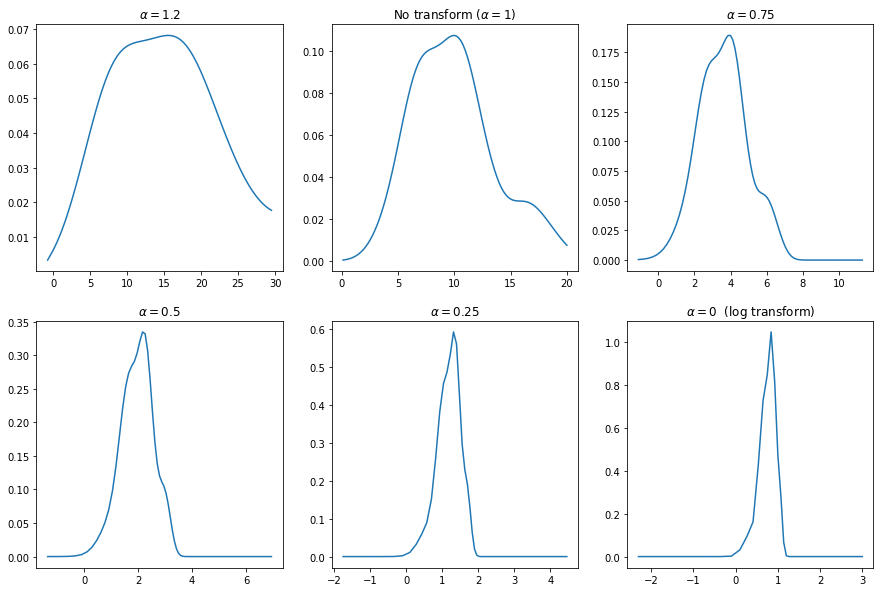

In [ ]:
x = np.linspace(0.1, 20,100)

plt.figure(figsize =(15,10))
plt.subplot(231)


bc = lambda x: boxcox(x,1.2)

plt.plot(bc(x), gaussian_kde(bc(example_data)).pdf(x))


plt.title("$\\alpha =1.2$" )


plt.subplot(232)


plt.plot(x, gaussian_kde(example_data).pdf(x))
plt.title("No transform ($\\alpha =1$)" )






plt.subplot(233)


bc = lambda x: boxcox(x,.75)

plt.plot(bc(x), gaussian_kde(bc(example_data)).pdf(x))


plt.title("$\\alpha =0.75$" )





plt.subplot(234)


bc = lambda x: boxcox(x,.5)

plt.plot(bc(x), gaussian_kde(bc(example_data)).pdf(x))


plt.title("$\\alpha =0.5$" )




plt.subplot(235)

bc = lambda x: boxcox(x,.25)

plt.plot(bc(x), gaussian_kde(bc(example_data)).pdf(x))


plt.title("$\\alpha =0.25$" )


plt.subplot(236)

bc = lambda x: boxcox(x,0)

plt.plot(bc(x), gaussian_kde(bc(example_data)).pdf(x))


plt.title("$\\alpha =0$  (log transform)" )







plt.show()

We conclude (heuristically) that $\alpha = .25$ seems suitable. 